**Importing** **libraries**

In [1]:
#necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
from scipy.io.arff import loadarff

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing sklearn modules
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
import numpy
seed=7
numpy.random.seed(7)

**Loading** **Dataset**

In [4]:
ch = pd.read_csv("/content/Child_Data.csv")

**Understanding** **Data**

In [5]:
ch.shape

(292, 22)

In [6]:
ch.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,0,0,1,1,0,1,0,...,m,Others,no,no,Jordan,no,5,4-11 years,Parent,NO
1,2,1,1,0,0,1,1,0,1,0,...,m,Middle Eastern,no,no,Jordan,no,5,4-11 years,Parent,NO
2,3,1,1,0,0,0,1,1,1,0,...,m,NaN,no,no,Jordan,yes,5,4-11 years,NaN,NO
3,4,0,1,0,0,1,1,0,0,0,...,f,NaN,yes,no,Jordan,no,4,4-11 years,NaN,NO
4,5,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,United States,no,10,4-11 years,Parent,YES


In [7]:
ch.isnull().sum()

id                  0
A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 4
gender              0
ethnicity          43
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           43
Class/ASD           0
dtype: int64

In [8]:
#total Missing values
ch.isnull().sum().sum()

90

In [9]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               292 non-null    int64  
 1   A1_Score         292 non-null    int64  
 2   A2_Score         292 non-null    int64  
 3   A3_Score         292 non-null    int64  
 4   A4_Score         292 non-null    int64  
 5   A5_Score         292 non-null    int64  
 6   A6_Score         292 non-null    int64  
 7   A7_Score         292 non-null    int64  
 8   A8_Score         292 non-null    int64  
 9   A9_Score         292 non-null    int64  
 10  A10_Score        292 non-null    int64  
 11  age              288 non-null    float64
 12  gender           292 non-null    object 
 13  ethnicity        249 non-null    object 
 14  jundice          292 non-null    object 
 15  austim           292 non-null    object 
 16  contry_of_res    292 non-null    object 
 17  used_app_before 

In [10]:
ch.describe()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,288.000000,292.000000
mean,146.500000,0.633562,0.534247,0.743151,0.551370,0.743151,0.712329,0.606164,0.496575,0.493151,0.726027,6.354167,6.239726
std,84.437354,0.482658,0.499682,0.437646,0.498208,0.437646,0.453454,0.489438,0.500847,0.500811,0.446761,2.365456,2.284882
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,73.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000
50%,146.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,6.000000,6.000000
75%,219.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,8.000000
max,292.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,10.000000


In [11]:
print("\nNo of children diagonised with ASD = ",len(ch[ch['Class/ASD'] == 'YES']))
print("No of children not diagonised with ASD = ",len(ch[ch['Class/ASD'] == 'NO']))


No of children diagonised with ASD =  141
No of children not diagonised with ASD =  151


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


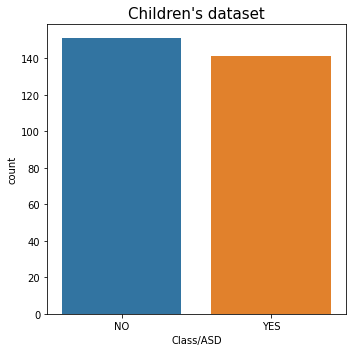

In [12]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(ch['Class/ASD'])
ax.set_title("Children's dataset",fontsize = 15)
fig.tight_layout()

In [13]:
fig = px.histogram(ch[ch['Class/ASD'] == 'YES'], x="age", color="gender")
fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    title = "Age distribution of ASD positive children over gender"
    )
fig.update_traces(marker_line_width=1)
fig.show()

In [14]:
ch.isnull().sum()

id                  0
A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 4
gender              0
ethnicity          43
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           43
Class/ASD           0
dtype: int64

In [15]:
ch[['age', 'ethnicity','relation']] = ch[['age', 'ethnicity','relation']].fillna(ch[['age', 'ethnicity','relation']].mean)

In [16]:
ch.isnull().sum()

id                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [17]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               292 non-null    int64 
 1   A1_Score         292 non-null    int64 
 2   A2_Score         292 non-null    int64 
 3   A3_Score         292 non-null    int64 
 4   A4_Score         292 non-null    int64 
 5   A5_Score         292 non-null    int64 
 6   A6_Score         292 non-null    int64 
 7   A7_Score         292 non-null    int64 
 8   A8_Score         292 non-null    int64 
 9   A9_Score         292 non-null    int64 
 10  A10_Score        292 non-null    int64 
 11  age              292 non-null    object
 12  gender           292 non-null    object
 13  ethnicity        292 non-null    object
 14  jundice          292 non-null    object
 15  austim           292 non-null    object
 16  contry_of_res    292 non-null    object
 17  used_app_before  292 non-null    ob

**preprocessing**

In [18]:

# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
le = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
ch['Class/ASD']= le.fit_transform(ch['Class/ASD'])
  
ch['Class/ASD'].unique()

array([0, 1])

In [19]:


ch['age'] = ch['age'].astype(str)
ch['age']= le.fit_transform(ch['age'])

In [20]:
ch['gender']= le.fit_transform(ch['gender'])

In [21]:
ch['ethnicity'] = ch['ethnicity'].astype(str)
ch['ethnicity']= le.fit_transform(ch['ethnicity'])

In [22]:
ch['jundice']= le.fit_transform(ch['jundice'])

In [23]:
ch['austim']= le.fit_transform(ch['austim'])

In [24]:
ch['contry_of_res']= le.fit_transform(ch['contry_of_res'])

In [25]:
ch['used_app_before']= le.fit_transform(ch['used_app_before'])


In [26]:
ch.drop(columns=['age_desc'],axis = 1,inplace=True)

In [27]:
ch['relation'] = ch['relation'].astype(str)
ch['relation']= le.fit_transform(ch['relation'])

In [28]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               292 non-null    int64
 1   A1_Score         292 non-null    int64
 2   A2_Score         292 non-null    int64
 3   A3_Score         292 non-null    int64
 4   A4_Score         292 non-null    int64
 5   A5_Score         292 non-null    int64
 6   A6_Score         292 non-null    int64
 7   A7_Score         292 non-null    int64
 8   A8_Score         292 non-null    int64
 9   A9_Score         292 non-null    int64
 10  A10_Score        292 non-null    int64
 11  age              292 non-null    int64
 12  gender           292 non-null    int64
 13  ethnicity        292 non-null    int64
 14  jundice          292 non-null    int64
 15  austim           292 non-null    int64
 16  contry_of_res    292 non-null    int64
 17  used_app_before  292 non-null    int64
 18  result    

**z**-**score**

In [29]:
import scipy.stats as stats

In [30]:
chz=stats.zscore(ch)
chz

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,-1.726129,0.760512,0.933700,-1.700980,-1.108606,0.587896,0.635489,-1.240617,1.006873,-0.986394,...,0.412419,0.635489,0.106190,-0.614295,-0.449050,-0.371079,-0.197853,-0.543509,0.286900,-0.966320
1,-1.714266,0.760512,0.933700,-1.700980,-1.108606,0.587896,0.635489,-1.240617,1.006873,-0.986394,...,0.412419,0.635489,-0.139901,-0.614295,-0.449050,-0.371079,-0.197853,-0.543509,0.286900,-0.966320
2,-1.702402,0.760512,0.933700,-1.700980,-1.108606,-1.700980,0.635489,0.806051,1.006873,-0.986394,...,0.412419,0.635489,-1.370352,-0.614295,-0.449050,-0.371079,5.054251,-0.543509,-2.072951,-0.966320
3,-1.690539,-1.314904,0.933700,-1.700980,-1.108606,0.587896,0.635489,-1.240617,-0.993174,-0.986394,...,-0.102224,-1.573592,-1.370352,1.627882,-0.449050,-0.371079,-0.197853,-0.981920,-2.072951,-0.966320
4,-1.678676,0.760512,0.933700,0.587896,0.902034,0.587896,0.635489,0.806051,1.006873,1.013794,...,-0.102224,0.635489,0.106190,1.627882,-0.449050,1.171140,-0.197853,1.648545,0.286900,1.034854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1.678676,0.760512,0.933700,0.587896,0.902034,0.587896,0.635489,0.806051,1.006873,1.013794,...,0.927063,-1.573592,1.090551,1.627882,2.226922,1.114021,-0.197853,1.648545,0.286900,1.034854
288,1.690539,0.760512,-1.071008,-1.700980,-1.108606,0.587896,-1.573592,0.806051,-0.993174,-0.986394,...,0.927063,-1.573592,1.090551,1.627882,2.226922,-1.570583,-0.197853,-0.981920,0.286900,-0.966320
289,1.702402,0.760512,-1.071008,0.587896,0.902034,0.587896,0.635489,0.806051,-0.993174,-0.986394,...,-0.616867,0.635489,-0.385991,-0.614295,-0.449050,-1.284987,-0.197853,0.333312,0.286900,1.034854
290,1.714266,0.760512,0.933700,0.587896,-1.108606,0.587896,0.635489,0.806051,1.006873,1.013794,...,-0.616867,0.635489,0.598370,-0.614295,-0.449050,-0.713795,-0.197853,1.210134,0.286900,1.034854


In [31]:
'''chz['Class/ASD']=chz['Class/ASD'].astype(int)'''
chz=chz.astype(int)
chz.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,-1,0,0,-1,-1,0,0,-1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,-1,0,0,-1,-1,0,0,-1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,-1,0,0,-1,-1,-1,0,0,1,0,...,0,0,-1,0,0,0,5,0,-2,0
3,-1,-1,0,-1,-1,0,0,-1,0,0,...,0,-1,-1,1,0,0,0,0,-2,0
4,-1,0,0,0,0,0,0,0,1,1,...,0,0,0,1,0,1,0,1,0,1


**Model** **Fitting**

In [32]:
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  
#Extracting Independent and dependent Variable
x = chz.drop('Class/ASD', axis=1)
y = chz['Class/ASD']

In [33]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  


**svm**

In [34]:
#DataFrame for Models Accuracy Score
model_df = pd.DataFrame(columns=["Model Name","Accuracy Score"])

In [35]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='rbf', random_state=0)  
classifier.fit(x_train, y_train) 

SVC(random_state=0)

In [36]:
y_pred= classifier.predict(x_test)  

In [37]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 91.78082191780823


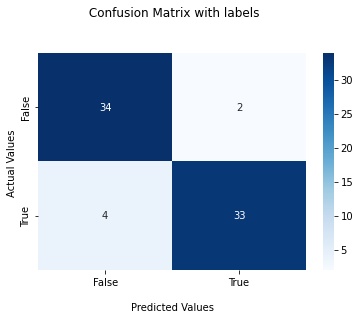

Sensitivity :  0.9444444444444444
Specificity :  0.8918918918918919


In [38]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
sensitivity1 = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])
print('Specificity : ', specificity1)


In [39]:
new_row = {"Model Name":"SVM", "Accuracy Score":metrics.accuracy_score(y_test, y_pred)*100}
model_df = model_df.append(new_row, ignore_index=True)

**Adaboostclassifier**

In [40]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 98.63013698630137


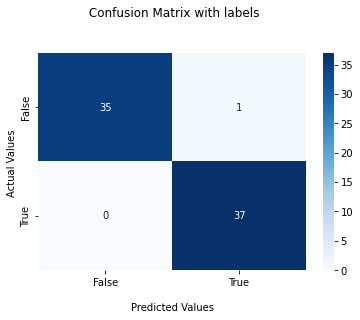

Sensitivity :  0.9722222222222222
Specificity :  1.0


In [41]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
sensitivity1 = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])
print('Specificity : ', specificity1)


In [42]:
new_row = {"Model Name":"Adaboost Classifier", "Accuracy Score":metrics.accuracy_score(y_test, y_pred)*100}
model_df = model_df.append(new_row, ignore_index=True)

**Decision** **Tree** **Classifier**

In [43]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

In [44]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)


In [45]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)


Accuracy: 87.67123287671232


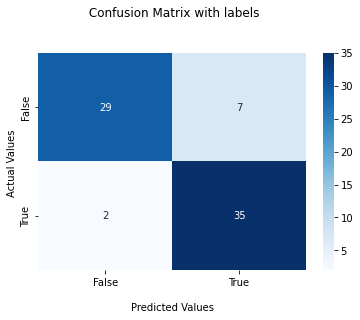

Sensitivity :  0.8055555555555556
Specificity :  0.9459459459459459


In [46]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
sensitivity1 = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])
print('Specificity : ', specificity1)


In [47]:
new_row = {"Model Name":"Decision Tree Classifier", "Accuracy Score":metrics.accuracy_score(y_test, y_pred)*100}
model_df = model_df.append(new_row, ignore_index=True)

**LinearDiscriminantAnalysis**

In [48]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [49]:
model = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print(' Accuracy is: %.3f ' % (mean(scores)*100))

 Accuracy is: 97.824 


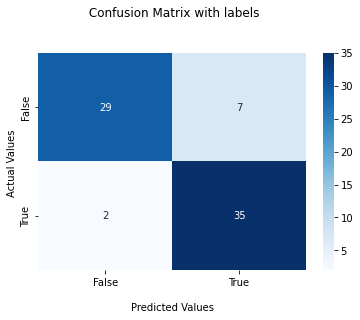

Sensitivity :  0.8055555555555556
Specificity :  0.9459459459459459


In [50]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
sensitivity1 = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])
print('Specificity : ', specificity1)


In [51]:
new_row = {"Model Name":"Linear Discriminant Analysis", "Accuracy Score":metrics.accuracy_score(y_test, y_pred)*100}
model_df = model_df.append(new_row, ignore_index=True)

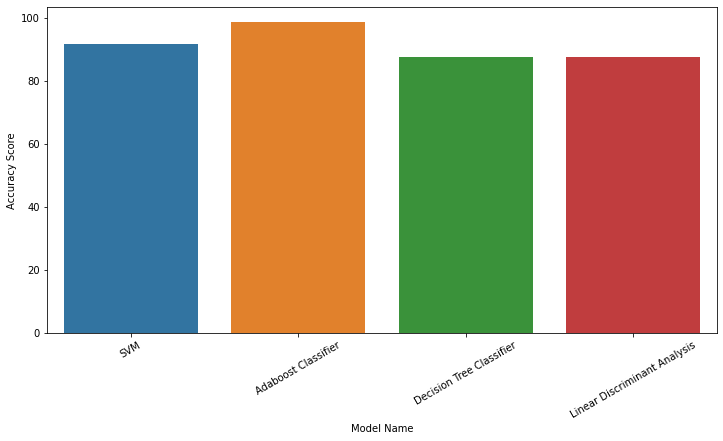

In [55]:
plt.figure(figsize=(12,6))
sns.barplot(x=model_df["Model Name"], y=model_df["Accuracy Score"])
plt.xticks(rotation=30)
plt.show()